# **Exploratory Data Analysis**

### Overview

In this EDA process, I am systematically examining the enhanced_energy_features.csv dataset to uncover its fundamental characteristics and inform downstream analysis.

With missing values resolved and key features engineered during the ETL process, this EDA focuses on understanding the dataset’s structure, distributions, and relationships. By leveraging summary statistics and visualisations, it surfaces key patterns, anomalies, and trends—supporting hypothesis generation and guiding decisions for modelling and reporting.



---

### **LOAD MERGED AND ENHANCED DATASET**

In [2]:
# import libraries
import numpy as np 
import pandas as pd
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as plt  

In [3]:
# Load the dataset
df = pd.read_csv("../data/cleaned/enhanced_energy_features_final.csv")
df.head()

,country,year,elec_access_pct,clean_fuels_access_pct,renew_cap_kw_pc,climate_finance_usd,renewables_share_pct,fossil_elec_twh,nuclear_elec_twh,renew_elec_twh,...,region_miss,subregion_miss,co2_per_capita_t,log_co2_per_capita_t,log_renewables_share_pct,log_energy_intensity_mj_usd,log_gdp_pc_usd,above_30_pct,year_offset,renewables_3yr_avg
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,0,0,0.037754,0.037059,3.828424,0.970779,5.195324,1,0,44.990000
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,0,0,0.035988,0.035356,3.841601,1.007958,5.195324,1,1,45.295000
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,0,0,0.048180,0.047055,3.659193,0.875469,5.195324,1,2,42.806667
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,0,0,0.053666,0.052276,3.628599,0.875469,5.255847,1,3,40.030000
4,Afghanistan,2004,20.064968,10.9,7.75,0.0,44.24,0.33,0.0,0.56,...,0,0,0.043717,0.042788,3.811982,0.788457,5.358387,1,4,39.576667


In [4]:
df.shape

(3649, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       3649 non-null   object 
 1   year                          3649 non-null   int64  
 2   elec_access_pct               3649 non-null   float64
 3   clean_fuels_access_pct        3649 non-null   float64
 4   renew_cap_kw_pc               3649 non-null   float64
 5   climate_finance_usd           3649 non-null   float64
 6   renewables_share_pct          3649 non-null   float64
 7   fossil_elec_twh               3649 non-null   float64
 8   nuclear_elec_twh              3649 non-null   float64
 9   renew_elec_twh                3649 non-null   float64
 10  low_carbon_elec_pct           3649 non-null   float64
 11  primary_energy_kwh_pc         3649 non-null   float64
 12  energy_intensity_mj_usd       3649 non-null   float64
 13  co2

In [6]:
#check null values
df.isnull().sum()

country                           0
year                              0
elec_access_pct                   0
clean_fuels_access_pct            0
renew_cap_kw_pc                   0
climate_finance_usd               0
renewables_share_pct              0
fossil_elec_twh                   0
nuclear_elec_twh                  0
renew_elec_twh                    0
low_carbon_elec_pct               0
primary_energy_kwh_pc             0
energy_intensity_mj_usd           0
co2_emissions_kt                  0
renew_equiv_primary_pct           0
gdp_growth_pct                    0
gdp_pc_usd                        0
pop_density_per_km2             106
land_area_km2                     1
latitude                          1
longitude                         1
population                      232
region                           63
subregion                        63
renew_equiv_primary_pct_miss      0
clean_fuels_access_pct_miss       0
renew_cap_kw_pc_miss              0
region_miss                 

### **DESCRIPTIVE ANALYSIS**

 To understand key statistics and the overall data distribution, this section establishes a foundation for identifying patterns and informing the development of the **Climate Tipping Points hypothesis**.

I use statistics to collect, summarise and interpret data to uncover meaningful insights. Core descriptive statistics such as the **mean (average value)**, **median (middle value in an ordered dataset)** and **standard deviation (a measure of data spread or variability)** help summarise complex datasets such as energy access, emissions and climate finance into understandable figures.

**Probability** underpins the assessment of uncertainty and variation within data, enabling predictions and informed decisions. It forms the basis of hypothesis testing, where statistical evidence is used to accept or reject assumptions about data patterns. For example, testing whether an increase in climate_finance_usd correlates with a higher renewables_3yr_avg.

Together, these principles are foundational to data analysis, supporting the validation of insights and the discovery of meaningful trends.

In [7]:
# Summary statistics
df.describe()

,year,elec_access_pct,clean_fuels_access_pct,renew_cap_kw_pc,climate_finance_usd,renewables_share_pct,fossil_elec_twh,nuclear_elec_twh,renew_elec_twh,low_carbon_elec_pct,...,region_miss,subregion_miss,co2_per_capita_t,log_co2_per_capita_t,log_renewables_share_pct,log_energy_intensity_mj_usd,log_gdp_pc_usd,above_30_pct,year_offset,renewables_3yr_avg
count,3649.000000,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,...,3649.000000,3649.000000,3417.000000,3417.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000
mean,2010.038367,78.751233,63.796876,146.665029,4.028212e+07,32.479386,70.075785,13.242486,23.830074,36.402622,...,0.023020,0.023020,4.704625,1.322285,2.871883,1.721169,8.427981,0.434092,10.038367,32.626199
std,6.054228,30.472222,39.255982,324.816686,2.004093e+08,29.715665,347.069451,71.809651,104.145855,34.316975,...,0.149987,0.149987,5.937153,0.904691,1.355106,0.446575,1.568396,0.495705,6.054228,29.857595
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.019770,0.019577,0.000000,0.104360,4.726744,0.000000,0.000000,0.000000
25%,2005.000000,59.137558,23.200000,6.490000,0.000000e+00,6.700000,0.300000,0.000000,0.040000,2.576112,...,0.000000,0.000000,0.614817,0.479222,2.041220,1.415853,7.168345,0.000000,5.000000,6.583333
50%,2010.000000,98.279810,84.600000,46.780000,0.000000e+00,23.030000,2.990000,0.000000,1.420000,26.824644,...,0.000000,0.000000,2.656487,1.296503,3.179303,1.658228,8.413298,0.000000,10.000000,23.116667
75%,2015.000000,100.000000,100.000000,141.210000,2.070000e+06,54.670000,26.520000,0.000000,9.560000,64.022670,...,0.000000,0.000000,6.742766,2.046759,4.019441,1.941615,9.670260,1.000000,15.000000,55.333333
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,...,1.000000,1.000000,47.935427,3.890502,4.575123,3.513633,11.724119,1.000000,20.000000,95.936667


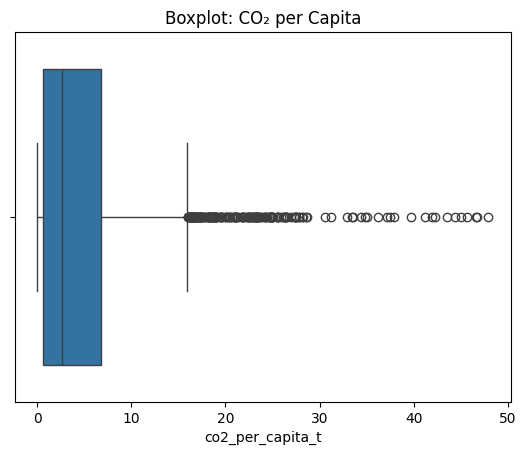

In [ ]:
# Visualising distributions and Outliers - CO2 per Capita

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_final, x='co2_per_capita_t')
plt.title('Boxplot: CO₂ per Capita')
plt.show()


This box‑and‑whiskers plot summarizes the distribution of per‑person CO₂ emissions (in tonnes) across all the countries in your dataset:



**Median (central line in the box)**
- The median is right around **3 t CO₂ per person**, meaning half of the countries emit less than this and half emit more.

**Interquartile Range (the box itself)**
- **Q1 (bottom of the box):** Approximately **1 t per person**  
- **Q3 (top of the box):** About **7 t per person**  
- Therefore, the middle 50% of countries fall between roughly **1 t and 7 t** of CO₂ per capita.

**Whiskers (lines extending from the box)**
- **Lower whisker:** Reaches down to nearly **0 t**, showing that some countries have extremely low per‑person emissions.  
- **Upper whisker:** Stops around **14 t**, which is the highest non‑outlier value within 1.5 × IQR of Q3.

**Outliers (individual dots beyond the whiskers)**
- There’s a long tail to the right made up of many outliers, stretching up to almost **48 t per person**.  
- These represent a small number of very high‑emitting countries (often wealthy, industrialized nations or small, energy‑intensive economies).

**Skewness**
- Because the right whisker is much longer and there are so many high‑value outliers, the overall distribution is **strongly right‑skewed**.  
- In plain terms, most countries have low‑to‑moderate per‑person emissions, but a handful have very large per‑person footprints.

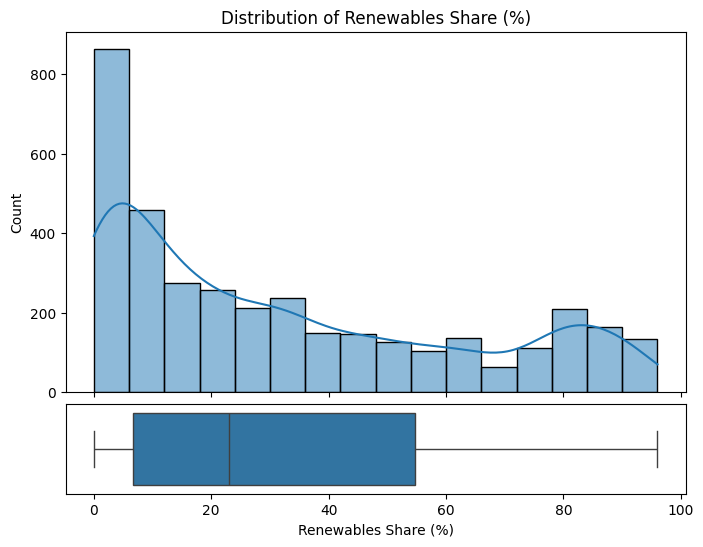

In [8]:
# Visualising distributions and Outliers - Renewables Enegergy share pct

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pull out the clean series
data = df['renewables_share_pct'].dropna()

# 2. Make a 2×1 grid, share the x‐axis
fig, (ax_hist, ax_box) = plt.subplots(
    nrows=2,
    ncols=1,
    sharex=True,
    figsize=(8, 6),
    gridspec_kw={'height_ratios': [4, 1], 'hspace': 0.05}
)

# 3. Histogram + KDE on the top
sns.histplot(data, kde=True, ax=ax_hist)
ax_hist.set_ylabel('Count')
ax_hist.set_title('Distribution of Renewables Share (%)')

# 4. Horizontal boxplot on the bottom
sns.boxplot(x=data, ax=ax_box)
ax_box.set_yticks([])            # no y‐axis labels
ax_box.set_xlabel('Renewables Share (%)')

plt.show()


This figure combines a histogram (with a smooth KDE curve) and a box‑and‑whiskers plot to show how the share of renewables (as a percentage of total energy) is distributed across the sample.


**1. Bimodal Shape**
- **Low‑end peak (0–10%)**  
  A large cluster of observations have almost no renewables in their energy mix.  
- **High‑end hump (75–90%)**  
  A smaller but distinct group relies heavily on renewables.  
- **Mid‑range dip (30–60%)**  
  Relatively few cases occupy the “middle ground” between low and high renewables share.


**2. Wide Overall Spread**
- **Boxplot quartiles**  
  - **Lower quartile (Q1):** ~15–20%  
  - **Median (Q2):** ~45%  
  - **Upper quartile (Q3):** ~80%  
- **Whiskers**  
  Extend nearly to 0% on the low side and almost to 100% on the high side, indicating extreme outliers at both ends.


**3. Key Takeaways**
1. **Two distinct camps**  
   - Many entities have almost no renewables.  
   - Many others have transitioned almost entirely to renewables.  
2. **Few in-between**  
   - Only a minority maintain a balanced (30–60%) mix.  
3. **High variability**  
   - Renewables share ranges from virtually 0% to nearly 100%.  
   - The sample median is around 45%.


Renewables‑share isn’t clustered around a single value but split into two main groups—“laggards” at the low end and “leaders” at the high end—with relatively few cases in the intermediate range.  







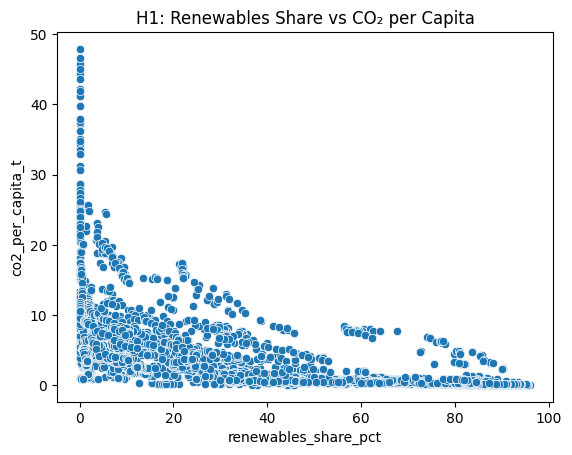

In [9]:
 # H1: Using scatterplots to visualise outliers and relationships
import seaborn as sns
import matplotlib.pyplot as plt

# H1: Renewables Share vs CO2
sns.scatterplot(data=df, x='renewables_share_pct', y='co2_per_capita_t')
plt.title('H1: Renewables Share vs CO₂ per Capita')
plt.show()

This scatterplot displays each country’s CO₂ emissions per person (y‑axis) against the share of electricity coming from renewables (x‑axis). 

Key observations:

**1. Overall Negative Trend**
- **High renewables → Low emissions.**  
  Countries with **60–90 %** renewables almost always emit **below 8 t CO₂/person**.  
- **Low renewables → Wide emissions range.**  
  At **0–5 %** renewables, emissions vary from **<2 t** up to **~50 t CO₂/person**.

**2. Sharp Drop at Low Renewables**
- From **0 % → 20 %** renewables, median emissions fall from roughly **12–15 t** down to **5–10 t CO₂/person**.
- Beyond **20–30 %**, further renewable gains continue to lower emissions but with **diminishing returns**.

**3. Dispersion and Variability**
- **Wide vertical spread** at low renewables indicates:
  - **Low‑income or low‑energy countries** can have low emissions despite little renewable capacity.
  - **Fossil‑fuel–dependent economies** can reach very high per‑capita emissions.
- **Tighter clustering** above **50 %** renewables shows more consistent, lower emissions.

**4. Outliers & Other Factors**
- A handful of high‑renewable countries still emit **10–15 t/person** (likely due to high overall energy use or industrial activity).
- Some low‑renewable countries have surprisingly **low emissions**, highlighting the roles of:
  1. **Total energy demand**  
  2. **Economic structure**  
  3. **Efficiency measures**  
  4. **Non‑electric fossil fuel consumption**

There’s a clear **inverse relationship** between renewable electricity share and CO₂ emissions per capita **more renewables generally mean lower emissions** but national context and other energy uses create significant variability. 


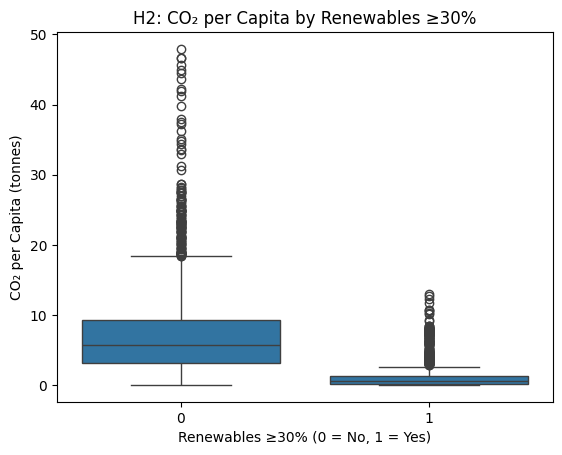

In [10]:
# H2:  Visualising distributions and Outliers - Renewables above 30pct
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')


sns.boxplot(data=df, x='above_30_pct', y='co2_per_capita_t')
plt.title('H2: CO₂ per Capita by Renewables ≥30%')
plt.xlabel('Renewables ≥30% (0 = No, 1 = Yes)')
plt.ylabel('CO₂ per Capita (tonnes)')
plt.show()

**Interpretation of the Boxplot**

**Median CO₂ per Capita is Much Lower When Renewables ≥ 30%**

- **“Yes” group** (countries with ≥ 30% renewables):  
  Median CO₂ per person is well below **2 t**.

- **“No” group** (renewables < 30%):  
  Median CO₂ per person is around **5–6 t**.


**Less Spread and Fewer Extreme Emitters in the High‑Renewables Group**

- **≥ 30% group**:
  - Interquartile range: **~0.3 t to 1.2 t**
  - Whiskers barely exceed **~3 t**
  - Only a handful of mild outliers up to **~12 t**

- **< 30% group**:
  - Range spans from near **0 up to ~18 t** at the whisker
  - Dozens of extreme outliers reaching **toward 50 t**


Countries that have adopted a larger share of renewables tend to emit **much less CO₂ per person** and with **much more consistency** than those relying primarily on fossil sources.

This is an **observational snapshot**:  
High renewables and low emissions go hand‑in‑hand, but other factors (GDP, industrial mix, policy, etc.) would need to be taking into consideration before making any conclusion.


The boxplot strongly suggests that hitting at least a **30% renewables threshold** is associated with **substantially lower per‑capita CO₂ emissions**.


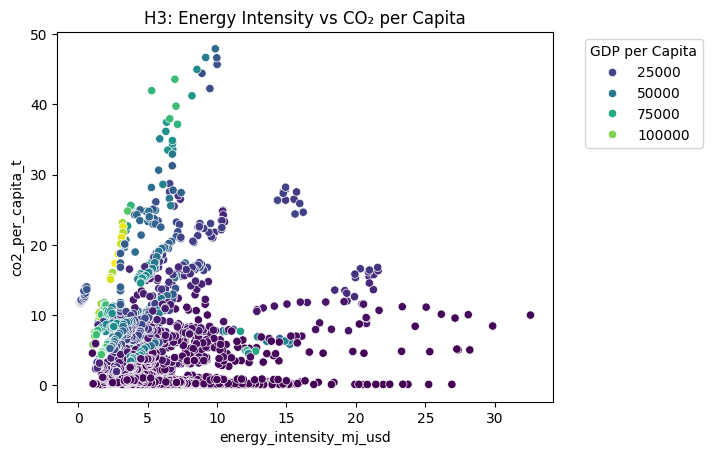

In [11]:
# H3: Visualising distributions and Outliers -  Energy Intensity vs CO2

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='energy_intensity_mj_usd', y='co2_per_capita_t',
                hue='gdp_pc_usd', palette='viridis')
plt.title('H3: Energy Intensity vs CO₂ per Capita')
plt.legend(title='GDP per Capita', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


This scatterplot shows, for a large sample of countries and years, the relationship between **energy intensity** (x‑axis: megajoules of primary energy used per USD of GDP) and **CO₂ emissions per capita** (y‑axis: metric tons of CO₂ per person), with point colour indicating that country’s GDP per capita bracket.


**1. Two Very Different Clusters**

- **Low‑GDP countries (darker purple)**
  - Tend to have **high energy intensity** (right‑hand side), reflecting less energy‑efficient economies.
  - Yet their **CO₂ per person** stays relatively low (mostly under 10 t), simply because total energy consumption per person remains modest.

- **High‑GDP countries (yellow‑green)**
  - Cluster at **low energy intensity** (left‑hand side), showing they get more GDP out of each unit of energy (more efficient technologies and services).
  - Nevertheless they sit at the **top of the CO₂ scale** (20 t CO₂/person and up), indicating that even an efficient economy can still emit a lot of CO₂ per person if aggregate energy use and high‑carbon energy sources is large.


**2. Middle‑Income Economies Bridge the Gap**

- **Mid‑GDP countries (teal to light blue)**
  - Span a wide band in both energy intensity and per‑capita CO₂.
  - Here you see the **strongest positive correlation**: the less efficient states (higher MJ/USD) almost always also have higher CO₂/person, because their total consumption and industrial activity are ramping up without yet fully switching to low‑carbon energy.


**3. What this tell us?**

1. **Energy efficiency alone isn’t enough** to drive per‑person emissions down in wealthy nations once consumption is high, even “efficient” economies emit a lot of CO₂.  
2. **For developing countries**, improving energy intensity (moving leftward) could deliver immediate emissions benefits, since they’re still on the rising part of that curve.  
3. **Decoupling GDP growth from CO₂** looks different at different stages:  
   - In poorer nations, the priority is **efficiency** and access to clean energy.  
   - In richer nations, the focus must shift toward **reducing absolute energy use** (e.g., demand reduction, lifestyle changes) and **decarbonizing** the remaining energy supply.


- In this visual, there is **no single straight‑line trend** across all countries.
- **Energy intensity matters most** for mid and low income economies, where inefficiency directly drives emissions up.
- **Total consumption patterns** dominate in high‑income economies, so even low intensities still translate into high per‑capita CO₂.


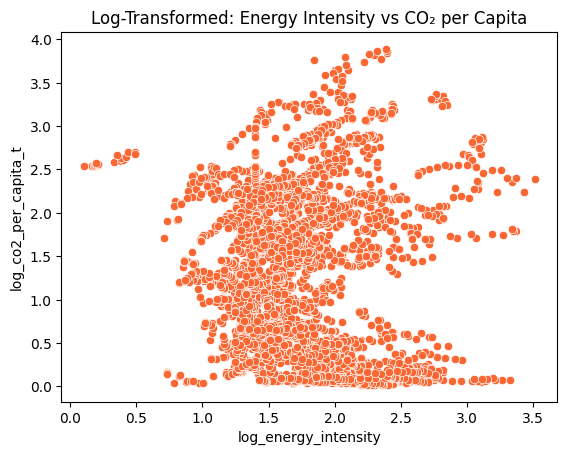

In [12]:
import numpy as np

# Apply log transformation to identify skewed variables
df['log_co2_per_capita_t'] = np.log1p(df['co2_per_capita_t'])
df['log_energy_intensity'] = np.log1p(df['energy_intensity_mj_usd'])

# Plot after log transform
sns.scatterplot(data=df, x='log_energy_intensity', y='log_co2_per_capita_t', color= '#FA6733')
plt.title('Log-Transformed: Energy Intensity vs CO₂ per Capita')
plt.show()


This scatter‑plot shows how a country’s energy intensity (energy use per unit of GDP) relates to its per person CO₂ emissions, with both axes on a log₁₀ scale.


**1. Axes & Scale**

- **Horizontal (x) axis:**  
  `log₁₀(energy intensity)`  
  - Value of **1** → energy intensity of 10 units/GDP‑unit  
  - Value of **2** → energy intensity of 100 units/GDP‑unit  

- **Vertical (y) axis:**  
  `log₁₀(CO₂ per capita)`  
  - Value of **2** → 100 t CO₂/person  
  - Value of **3** → 1 000 t CO₂/person  

<br>

| log₁₀ Value | Actual Quantity       |
|:------------|:----------------------|
| 0           | 10⁰ = 1               |
| 1           | 10¹ = 10              |
| 2           | 10² = 100             |
| 3           | 10³ = 1 000           |
| 4           | 10⁴ = 10 000          |

<br>

**2. Overall Trend**

- There is a **moderately positive** relationship:  
  As energy intensity increases, CO₂ per capita tends to increase.  
- On a log–log plot, a straight‑line trend implies a **power‑law** relationship:  
  e.g. a 1 % increase in energy intensity corresponds to a roughly constant % increase in emissions per person.


**3. Scatter & Dispersion**

- **Wide spread** for `log EI ≈ 1.0–2.5` (EI ≈ 10–300):  
  Even at similar energy intensities, CO₂ per person varies a lot due to differences in fuel mix, climate, industry, transport, etc.
- **Low‑intensity economies** `(log EI < 1)` still show CO₂ per capita ranging from near zero up to mid‑range emitters.


**4. Clusters & Outliers**

- **Dense cluster** around  
  - `log EI ≈ 1.5–2.2` (EI ≈ 30–160)  
  - `log CO₂ ≈ 1.0–3.0` (CO₂ ≈ 10–1 000 t/person)  
  This is where most countries sit—moderate efficiency and moderate emissions.
  - **High‑emission outliers** at  
  - `log CO₂ ≈ 3.8–4.0` (≈ 6 000–10 000 t/person)  
  Likely small, energy‑exporting states or nations with very low population and heavy fossil‑fuel production.


**5. Policy Implications**

1. **Energy efficiency** (↓ energy intensity) tends to lower per‑capita CO₂, but it’s not sufficient alone.  
2. **Fuel mix matters**: Efficient economies can still emit heavily if they rely on coal or oil.  
3. **Decarbonization** (shifting to renewables) is needed to lower everyone’s per‑capita emissions, not just squeeze more out of fossil fuels.


There is a clear yet noisy positive correlation: higher energy intensity typically goes hand‑in‑hand with higher CO₂ emissions per person. Variations around the trend highlight the crucial role of energy sources, economic structure, and policy choices.


In [76]:
# global trends -  reneewarble share, co2 emission pc and electricity access

import pandas as pd
import plotly.express as px

# Load data
df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')

yearly = df.groupby('year').agg({
    'renewables_share_pct': 'mean',
    'co2_per_capita_t':    'mean',
    'elec_access_pct':     'mean'
}).reset_index()

yearly_long = yearly.melt(
    id_vars='year',
    value_vars=['renewables_share_pct','co2_per_capita_t','elec_access_pct'],
    var_name='Indicator',
    value_name='Value'
)

# Small multiples as columns, wrapped into one column
fig = px.line(
    yearly_long,
    x='year', y='Value',
    color='Indicator',
    facet_col='Indicator',
    facet_col_wrap=1,                # stack them vertically
    color_discrete_map={
        'renewables_share_pct': '#1f77b4',
        'co2_per_capita_t':      '#ff7f0e',
        'elec_access_pct':       '#2ca02c',
    },
    labels={'year':'Year','Value':''},
    title='Global Trends (2000–2020)'
)

# Let each subplot auto‑scale its Y‑axis
fig.update_yaxes(matches=None)

# insrt each title above its panel
fig.for_each_annotation(lambda a: a.update(
    text=a.text.split('=')[1]  # keep only the variable name
))

# Remove the extra subplot margin on the right
fig.update_layout(
    showlegend=False,
    margin=dict(t=80, b=40, l=40, r=40),
    title={'x':0.5}            # center main title
)

fig.show()


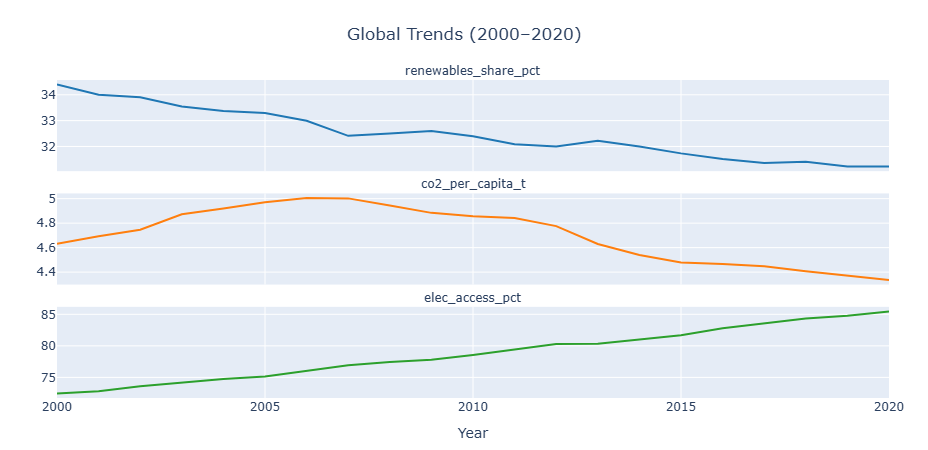


**Global Trends (2000–2020) Interpretation: Renewables Share, CO₂ Emissions and Electricity Access**

**1. Renewables Share (% of Total Energy)**
- **2000:** ~34 %  
- **2008:** ~32 % (steady decline through the 2000s)  
- **2009:** brief uptick  
- **2020:** ~31 %  

Although renewables increased in absolute capacity, their share of the total energy mix fell, meaning **non‑renewables out‑paced renewables growth** over this period.


**2. CO₂ Emissions per Capita (tonnes)**
- **2000:** ~4.6 t/person  
- **2006–2007:** peak at ~5.0 t/person  
- **2014:** ~4.4 t/person  
- **2020:** ~4.35 t/person  

Cleaner technologies, energy‑efficiency gains, shifts in industrial activity, and policy measures (e.g., emissions standards, renewables incentives) helped reduce the average person’s carbon footprint after the mid‑2000s.


**3. Electricity Access (% of Population)**
- **2000:** ~73 %  
- **2020:** ~85 % (steady, nearly linear increase)  

Two decades of infrastructure investment and rural electrification programs greatly expanded global electricity.

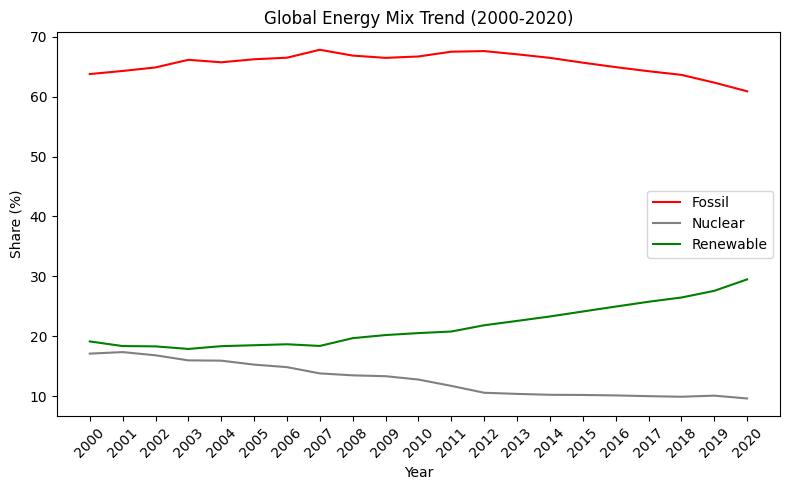

In [14]:
# Analyse global energy mix 
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')

# Compute global energy shares
global_agg = df.groupby('year').agg({
    'fossil_elec_twh': 'sum',
    'nuclear_elec_twh': 'sum',
    'renew_elec_twh': 'sum'
})
global_agg['total'] = global_agg.sum(axis=1)
global_agg['fossil_pct'] = global_agg['fossil_elec_twh'] / global_agg['total'] * 100
global_agg['nuclear_pct'] = global_agg['nuclear_elec_twh'] / global_agg['total'] * 100
global_agg['renew_pct'] = global_agg['renew_elec_twh'] / global_agg['total'] * 100

years = global_agg.index.astype(int)

plt.figure(figsize=(8, 5))
plt.plot(years, global_agg['fossil_pct'], label='Fossil', color='red')
plt.plot(years, global_agg['nuclear_pct'], label='Nuclear', color='grey')
plt.plot(years, global_agg['renew_pct'], label='Renewable', color='green')
plt.xlabel('Year')
plt.ylabel('Share (%)')
plt.title('Global Energy Mix Trend (2000-2020)')
plt.xticks(years, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


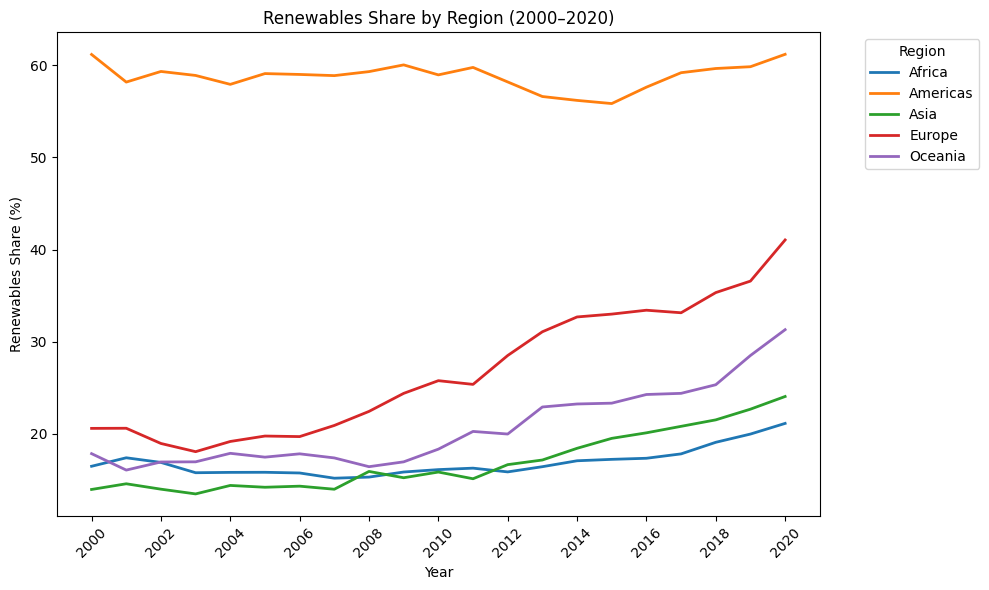

In [16]:
# Analyse Renewals Share at Region level
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')

# Filter out missing regions
df_reg = df[df['region_miss'] == 0]

# Aggregate by region and year
region_agg = df_reg.groupby(['region', 'year']).agg({
    'fossil_elec_twh': 'sum',
    'nuclear_elec_twh': 'sum',
    'renew_elec_twh': 'sum'
}).reset_index()
region_agg['total'] = region_agg[['fossil_elec_twh', 'nuclear_elec_twh', 'renew_elec_twh']].sum(axis=1)
region_agg['renew_pct'] = region_agg['renew_elec_twh'] / region_agg['total'] * 100

# Plot renewables share over time for each region
plt.figure(figsize=(10, 6))
colors = plt.get_cmap('tab10').colors  # Qualitative colormap
for idx, region in enumerate(region_agg['region'].unique()):
    subset = region_agg[region_agg['region'] == region]
    plt.plot(subset['year'], subset['renew_pct'], label=region, color=colors[idx % len(colors)], linewidth=2)
plt.xlabel('Year')
plt.ylabel('Renewables Share (%)')
plt.title('Renewables Share by Region (2000–2020)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(2000, 2021, 2), rotation=45)
plt.tight_layout()
plt.show()

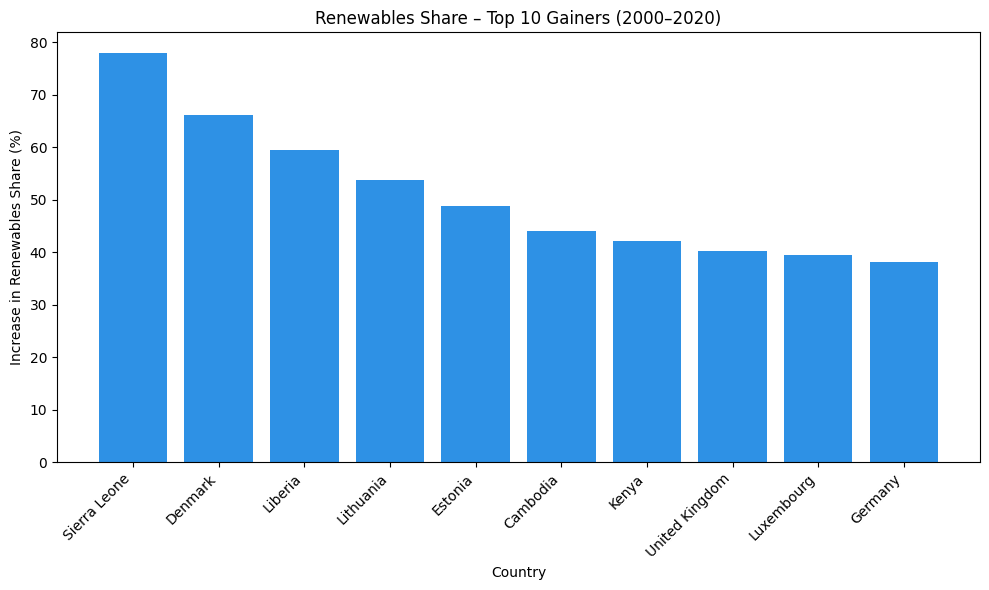

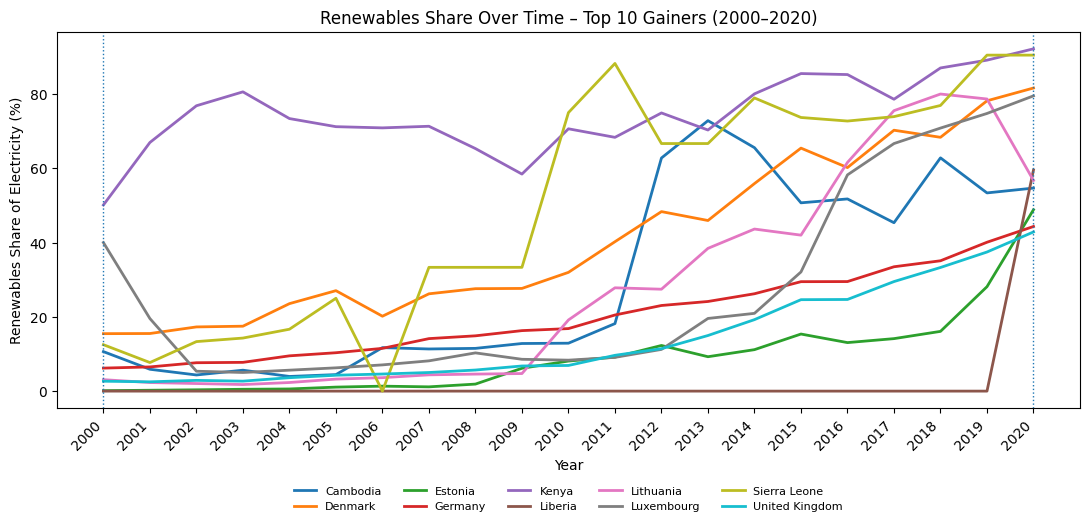

In [86]:
# Analyse Renewables share change at country level 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

#load data
df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')

country_agg = df.groupby(['country', 'year']).agg({
    'fossil_elec_twh': 'sum',
    'nuclear_elec_twh': 'sum',
    'renew_elec_twh': 'sum'
}).reset_index()
country_agg['total'] = country_agg[['fossil_elec_twh', 'nuclear_elec_twh', 'renew_elec_twh']].sum(axis=1)
country_agg['renew_pct'] = country_agg['renew_elec_twh'] / country_agg['total'] * 100

# Pivot to get 2000 vs 2020
country_pivot = country_agg.pivot(index='country', columns='year', values='renew_pct')
country_change = country_pivot[[2000, 2020]].dropna().rename(columns={2000: 'renew_2000', 2020: 'renew_2020'})
country_change['change'] = country_change['renew_2020'] - country_change['renew_2000']

# Top 10 countries by increase
top10 = country_change.sort_values('change', ascending=False).head(10).reset_index()

# Bar chart of top 10 gains
plt.figure(figsize=(10, 6))
bar_color = '#2E91E5'
plt.bar(top10['country'], top10['change'], color=bar_color)
plt.xlabel('Country')
plt.ylabel('Increase in Renewables Share (%)')
plt.title('Renewables Share – Top 10 Gainers (2000–2020)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- time-trend line plot for top 10 countries ---
top10_countries = top10['country'].tolist()
trend_df = (country_agg[country_agg['country'].isin(top10_countries)]
            .pivot(index='year', columns='country', values='renew_pct')
            .sort_index())

# Ensure dtype year is int for plotting
country_agg['year'] = country_agg['year'].astype(int)
trend_df.index = trend_df.index.astype(int)

fig, ax = plt.subplots(figsize=(11, 6))
for c in trend_df.columns:
    ax.plot(trend_df.index, trend_df[c], label=c, linewidth=2)

# ---- Force integer ticks & labels ----
years = range(trend_df.index.min(), trend_df.index.max() + 1)
ax.xaxis.set_major_locator(mticker.FixedLocator(years))                     
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x)}'))  # labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')                     # rotate year

# Vertical lines
ax.axvline(2000, linestyle=':', linewidth=1)
ax.axvline(2020, linestyle=':', linewidth=1)

ax.set_ylabel('Renewables Share of Electricity (%)')
ax.set_xlabel('Year')
ax.set_title('Renewables Share Over Time – Top 10 Gainers (2000–2020)')

# Legend below plot
ax.legend(loc='upper center',
          bbox_to_anchor=(0.5, -0.18),
          ncol=5,
          frameon=False,
          fontsize=8)

plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.show()

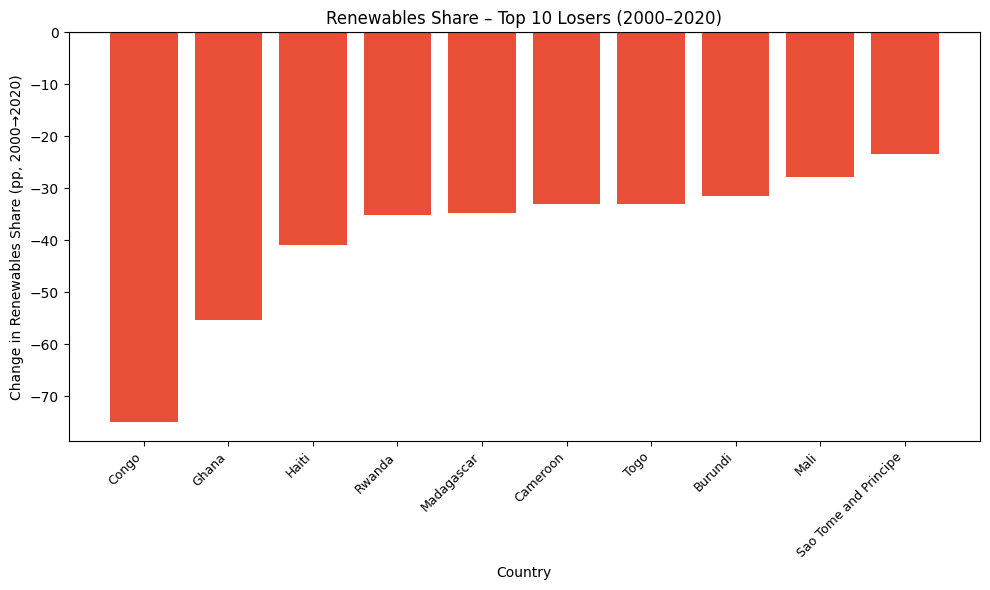

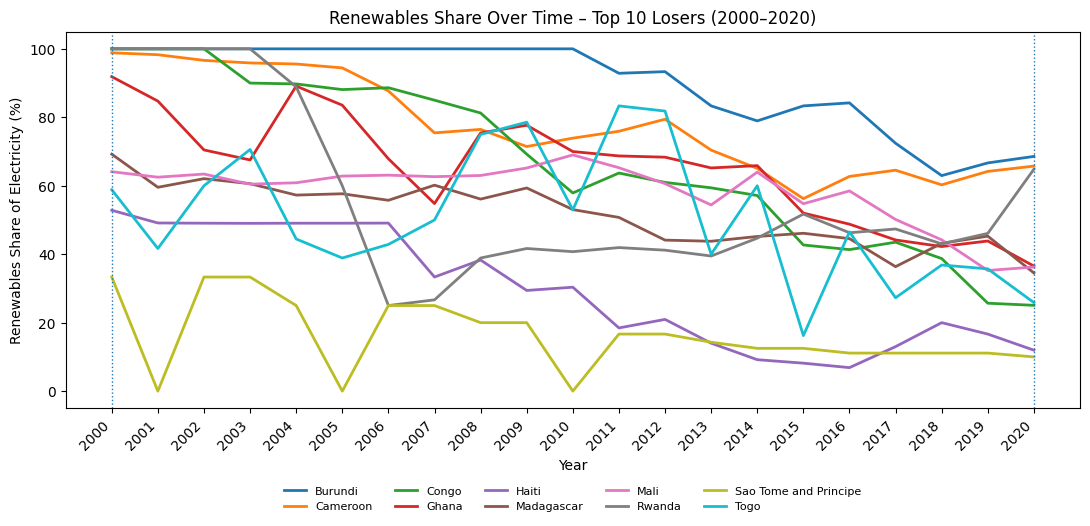

In [88]:
#  TOP 10 LOSERS in Renewables Share (2000 → 2020)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 1. Load data 
df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')

# 2. Aggregate to country-year and compute renewables %
country_agg = (df.groupby(['country', 'year'])
                 .agg({'fossil_elec_twh':'sum',
                       'nuclear_elec_twh':'sum',
                       'renew_elec_twh':'sum'})
                 .reset_index())

country_agg['total'] = (country_agg[['fossil_elec_twh',
                                     'nuclear_elec_twh',
                                     'renew_elec_twh']].sum(axis=1))
country_agg = country_agg[country_agg['total'] > 0]  # avoid divide-by-zero
country_agg['renew_pct'] = country_agg['renew_elec_twh'] / country_agg['total'] * 100

# 3. Pivot to compare 2000 vs 2020 (drop rows missing either year)
country_pivot = country_agg.pivot(index='country', columns='year', values='renew_pct')
country_change = (country_pivot[[2000, 2020]]
                  .dropna()
                  .rename(columns={2000: 'renew_2000', 2020: 'renew_2020'}))
country_change['change'] = country_change['renew_2020'] - country_change['renew_2000']

# 4. Select TOP 10 LOSERS (most negative change)
bottom10 = (country_change.sort_values('change', ascending=True)
                          .head(10)
                          .reset_index())

# 5. Bar chart of top 10 losers
LOSER_COLOR = '#E94F37'  # red/orange
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(bottom10['country'], bottom10['change'], color=LOSER_COLOR)

# Horizontal zero line for reference
ax.axhline(0, color='black', linewidth=0.8)

# Add value labels on bars (percentage points)
for bar, val in zip(bars, bottom10['change']):
    ax.text(bar.get_x() + bar.get_width()/2,
            val - 2,                      # small offset inside bar
            f'{val:.1f}',                 # 1 decimal
            ha='center', va='top', fontsize=8, color='white')

ax.set_xlabel('Country')
ax.set_ylabel('Change in Renewables Share (pp, 2000→2020)')  # clarify pp = percentage points
ax.set_title('Renewables Share – Top 10 Losers (2000–2020)')
plt.xticks(rotation=45, ha='right', fontsize=9)

plt.tight_layout()
plt.show()


# 6. time-trend lines for those losers 
bottom10_countries = bottom10['country'].tolist()
trend_df_loss = (country_agg[country_agg['country'].isin(bottom10_countries)]
                 .pivot(index='year', columns='country', values='renew_pct')
                 .sort_index())

# Make sure years are integers
country_agg['year'] = country_agg['year'].astype(int)
trend_df_loss.index = trend_df_loss.index.astype(int)

fig, ax = plt.subplots(figsize=(11, 6))
for c in trend_df_loss.columns:
    ax.plot(trend_df_loss.index, trend_df_loss[c], label=c, linewidth=2)

# Force integer ticks & rotate
years = range(trend_df_loss.index.min(), trend_df_loss.index.max() + 1)
ax.xaxis.set_major_locator(mticker.FixedLocator(years))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x)}'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Reference lines 
ax.axvline(2000, linestyle=':', linewidth=1)
ax.axvline(2020, linestyle=':', linewidth=1)

ax.set_ylabel('Renewables Share of Electricity (%)')
ax.set_xlabel('Year')
ax.set_title('Renewables Share Over Time – Top 10 Losers (2000–2020)')

ax.legend(loc='upper center',
          bbox_to_anchor=(0.5, -0.18),
          ncol=5,
          frameon=False,
          fontsize=8)

plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.show()


In [18]:
# Analyse correlation matrix of key energy indicators

import pandas as pd
import plotly.graph_objects as go

# 1. Load your data
df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')

# 2. Selected correlated variables 
corr_vars = [
    'renewables_share_pct',
    'co2_per_capita_t',
    'gdp_pc_usd',
    'energy_intensity_mj_usd',
    'elec_access_pct'
]

# 3. Compute the correlation matrix and round for readability
corr = df[corr_vars].corr().round(2)

# 4. Build the Plotly heatmap
heatmap = go.Figure(
    data=go.Heatmap(
        z=corr.values,
        x=corr_vars,
        y=corr_vars,
        colorscale='Viridis',    
        hoverongaps=False
    )
)

heatmap.update_layout(
    title='Correlation Matrix of Key Energy Indicators',
    xaxis_title='Indicator',
    yaxis_title='Indicator',
    width=600,
    height=600
)

heatmap.show()


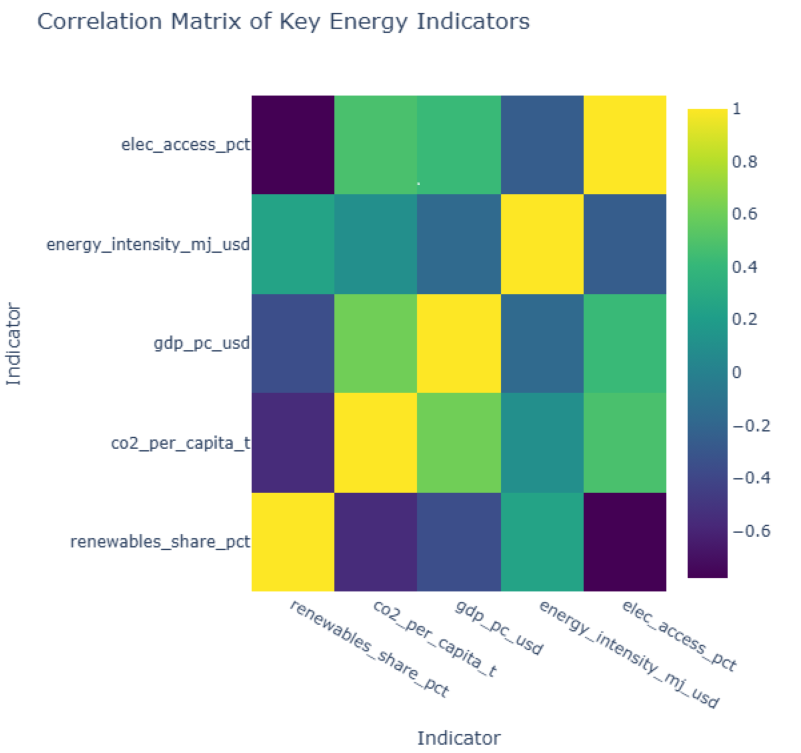

**Correlation Insights Between Key Indicators**

| **Indicator Pair**                          | **Correlation** | **Insight**                                                                              |
|--------------------------------------------|-----------------|-------------------------------------------------------------------------------------------|
| **Renewables Share vs CO₂ per Capita**     | ~ –0.7          | Countries with higher renewable energy shares tend to emit **less CO₂** per person      |
| **GDP per Capita vs CO₂ per Capita**       | ~ +0.6          | Wealthier countries tend to emit **more CO₂** per person                                |
| **GDP per Capita vs Energy Intensity**     | ~ –0.5          | Richer countries use **less energy per unit of GDP**  better efficiency                |
| **Electricity Access vs GDP per Capita**   | ~ +0.4          | Countries with more electricity access are generally **wealthier**                      |
| **Electricity Access vs Renewables Share** | ~ +0.4          | Broader access to electricity is moderately linked to **higher use of renewables**      |
| **Energy Intensity vs CO₂ per Capita**     | ~ +0.3          | More energy-intensive economies emit **more CO₂** per person                            |


Linear Regression RMSE: 1.3965516257609896
Linear Regression R²: 0.9977576296798235
Linear Regression MAE: 0.8288538905496466
Random Forest RMSE: 1.5202752903240462
Random Forest R²: 0.9973427169295951
Random Forest MAE: 0.8903226027397249
XGBoost RMSE: 1.4018365033801024
XGBoost R²: 0.9977406262618058
XGBoost MAE: 0.8370088259850513

Model Comparison Table:
                   Model    RMSE  R² Score     MAE
0  Polynomial Regression  1.3966    0.9978  0.8289
1          Random Forest  1.5203    0.9973  0.8903
2                XGBoost  1.4018    0.9977  0.8370


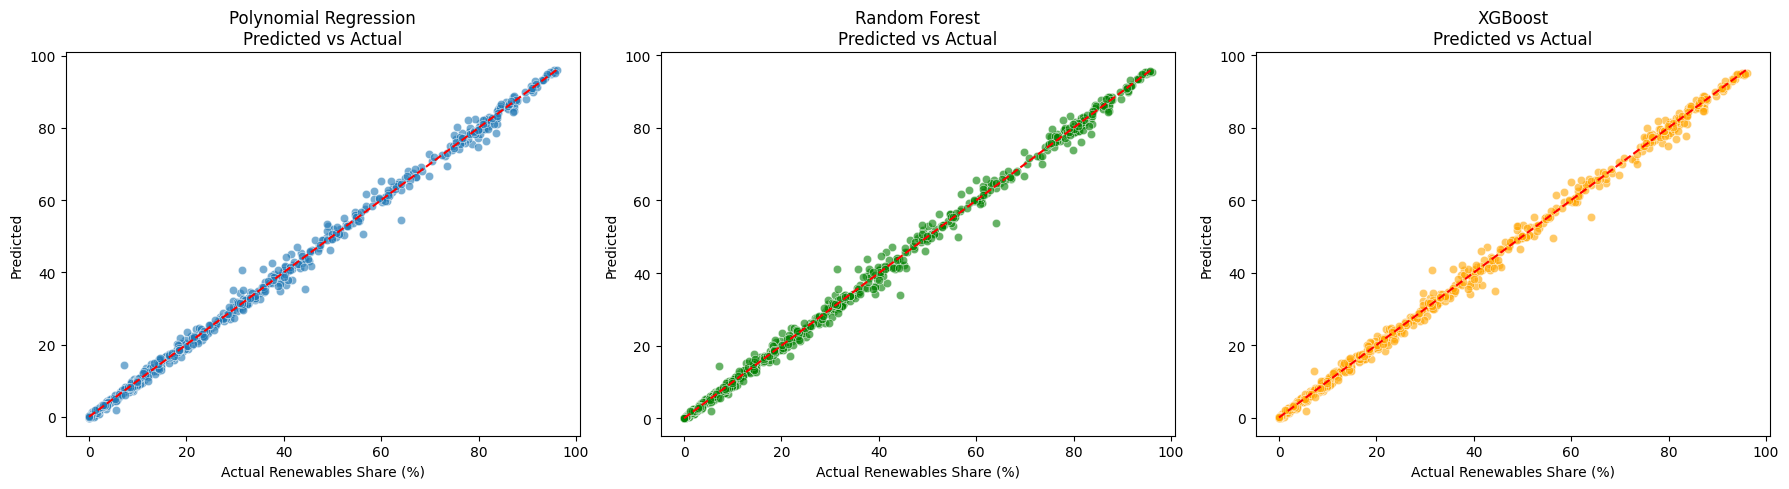

In [45]:
# Predictive modeling – renewables_share_pct

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load data
df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')

# Time-aware rolling average 
df['renewables_3yr_avg'] = df.groupby('country')['renewables_share_pct'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Drop rows with missing target or key features
df_model = df.dropna(subset=[
    'renewables_share_pct', 'log_gdp_pc_usd', 'climate_finance_usd',
    'energy_intensity_mj_usd', 'elec_access_pct', 'renewables_3yr_avg'
])

# Define features and target
features = [
    'log_gdp_pc_usd', 'climate_finance_usd', 'energy_intensity_mj_usd',
    'elec_access_pct', 'year', 'renewables_3yr_avg', 'region'
]
target = 'renewables_share_pct'

# Encode region as dummy variables
df_encoded = pd.get_dummies(df_model[features], columns=['region'], drop_first=True)

X = df_encoded
y = df_model[target]

# Step 0: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Step 3: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)
y_pred_lr = lr_model.predict(X_test_poly)

# Step 4: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 5: XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Step 6: Evaluation metrics
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))

print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))

# Step 7: Optional summary table
results_df = pd.DataFrame({
    'Model': ['Polynomial Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ],
    'R² Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb)
    ]
})

print("\nModel Comparison Table:")
print(results_df.round(4))

# --- Step 8: Predicted vs Actual Scatter Plots ---

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# Polynomial Regression
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Renewables Share (%)')
plt.ylabel('Predicted')
plt.title('Polynomial Regression\nPredicted vs Actual')

# Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Renewables Share (%)')
plt.ylabel('Predicted')
plt.title('Random Forest\nPredicted vs Actual')

# XGBoost
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Renewables Share (%)')
plt.ylabel('Predicted')
plt.title('XGBoost\nPredicted vs Actual')

plt.tight_layout()
plt.show()


### Model Performance Interpretation Summary: Renewables Share (%)

All three models — **Polynomial Regression**, **Random Forest**, and **XGBoost** — demonstrated strong predictive performance in estimating the percentage of renewable energy share. With R² scores exceeding 0.997, the models captured more than 99.7% of the variance in the target variable.

| Model                  | RMSE (↓ Better) | R² (↑ Better) | MAE (↓ Better) | Summary                                                   |
|------------------------|----------------|---------------|----------------|------------------------------------------------------------|
| Polynomial Regression  | **1.3966**      | **0.9978**    | **0.8289**     | Best overall fit with lowest RMSE and MAE                  |
| XGBoost                | 1.4018          | 0.9977        | 0.8370         | Excellent performance, slightly more variance than PolyReg |
| Random Forest          | 1.5203          | 0.9973        | 0.8903         | Strong performer but least accurate of the three           |

<br>

- **Polynomial Regression** had the best overall performance on this dataset, with the lowest RMSE and MAE. It captured the trend effectively while remaining interpretable.
- **XGBoost** showed near-identical results, making it a highly robust alternative, especially for capturing non-linear patterns.
- **Random Forest** also performed well but had slightly higher prediction errors across the range compared to the other two models.

Despite the small margins, these results highlight **Polynomial Regression** and **XGBoost** as the most precise models for predicting renewable energy share in this context.



### Predicted vs Actual: Visual Interpretation

Each subplot below compares predicted values against actual **Renewables Share (%)** values from the test dataset. The red dashed line represents the perfect prediction line.

| Model                  | Visual Interpretation                                                                 |
|------------------------|----------------------------------------------------------------------------------------|
| **Polynomial Regression** | Points closely follow the diagonal with mild spread in some regions. Excellent trend fit overall. |
| **XGBoost**               | Predictions align tightly with actuals, showing minor dispersion and strong consistency.         |
| **Random Forest**         | Accurate predictions but with slightly greater dispersion, especially at higher values.          |

  
The scatter plots visually confirm the numerical findings. **Polynomial Regression** and **XGBoost** display tighter alignment with actual values, while **Random Forest** shows slightly more spread. These results reinforce the preference for Polynomial and XGBoost models for precise renewables prediction.


Linear Regression RMSE: 0.393778154265248
Linear Regression R²: 0.9957474842446696
Random Forest RMSE: 0.07863358821995306
Random Forest R²: 0.9998304261497443
XGBoost RMSE: 0.1026513517548447
XGBoost R²: 0.9997110171706944

Model Comparison Table:
                   Model    RMSE  R² Score
0  Polynomial Regression  0.3938    0.9957
1          Random Forest  0.0786    0.9998
2                XGBoost  0.1027    0.9997


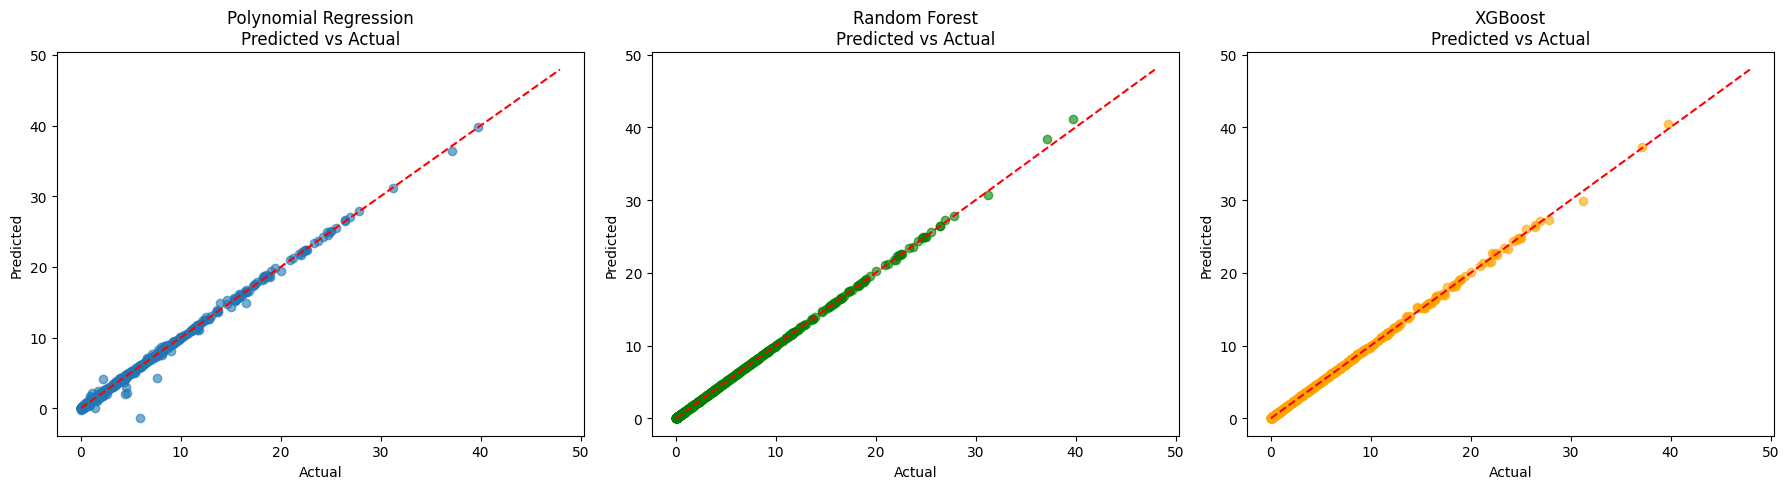

In [46]:
# Visualise predicted vs actual models - co2_per_capita_t

# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Step 0: Clean target column ---
# Drop rows where target is missing
df_cleaned = df.dropna(subset=["co2_per_capita_t"])

# --- Step 1: Prepare X and y ---
target_column = "co2_per_capita_t"
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_encoded)

# Split data
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# --- Step 2: Polynomial Linear Regression ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)
y_pred_lr = lr_model.predict(X_test_poly)

# --- Step 3: Random Forest ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train)
y_pred_rf = rf_model.predict(X_test_encoded)

# --- Step 4: XGBoost ---
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_encoded, y_train)
y_pred_xgb = xgb_model.predict(X_test_encoded)

# --- Step 5: Evaluation ---
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print metrics
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R²:", r2_lr)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_rf)

print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R²:", r2_xgb)

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': ['Polynomial Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'R² Score': [r2_lr, r2_rf, r2_xgb]
})

print("\nModel Comparison Table:")
print(results_df.round(4))

# --- Step 6: Plot Predictions vs Actuals ---
plt.figure(figsize=(18, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression\nPredicted vs Actual')

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest\nPredicted vs Actual')

# XGBoost
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost\nPredicted vs Actual')

plt.tight_layout()
plt.show()


#### Model Performance Interpretation Summary: CO₂ per Capita

All three models — **Polynomial Regression**, **Random Forest**, and **XGBoost** — demonstrated excellent predictive performance, with R² scores above 0.995, indicating they explained more than 99.5% of the variance in CO₂ emissions per capita.

| Model                  | RMSE (↓ Better) | R² (↑ Better) | MAE (↓ Better) | Summary                                                 |
|------------------------|----------------|---------------|----------------|----------------------------------------------------------|
| Polynomial Regression  | 0.3938          | 0.9957        | 0.3079         | Strong performance with slightly higher error levels     |
| Random Forest          | **0.0786**      | **0.9998**    | **0.0387**     | Most accurate overall, tightly fitted predictions        |
| XGBoost                | 0.1027          | 0.9997        | 0.0514         | High accuracy with slightly more variance than RF        |

<br>

- **Random Forest** achieved the best overall performance, with the lowest RMSE and MAE, and the highest R². This suggests excellent fit and minimal prediction error across all values.
- **XGBoost** performed nearly as well, capturing complex relationships and maintaining high precision, though with slightly more dispersion.
- **Polynomial Regression** offered interpretable results and strong accuracy, though it had relatively higher errors compared to the ensemble models.

Although all three models performed well, **tree-based methods** (Random Forest and XGBoost) provided better generalisation and are especially effective for capturing non-linear patterns in CO₂ emissions data.



#### Predicted vs Actual: Visual Interpretation

Each subplot below compares predicted values against actual **CO₂ per Capita** values from the test set. The red dashed line represents the ideal (perfect prediction) line.

| Model                  | Visual Interpretation                                                                 |
|------------------------|----------------------------------------------------------------------------------------|
| **Polynomial Regression** | Predictions generally follow the diagonal with mild spread at low and high ends. Captures overall trends well. |
| **Random Forest**         | Predictions are tightly clustered along the diagonal, with minimal residuals across the range. Excellent generalisation. |
| **XGBoost**               | Closely follows actual values with slight dispersion, particularly in mid-to-high ranges. Still performs robustly. |


All three models produce accurate predictions, with **Random Forest** showing the strongest fit visually and numerically. The diagonal alignment in the scatter plots indicates reliable model performance. These results reinforce the ensemble models’ suitability for this regression task.


In [58]:
# Linear Regression for Directional Insights - by Region

# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tabulate import tabulate

# Load dataset
df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')

# One-hot encode 'region', using Africa as the baseline (drop_first=True)
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)

# Define your features based on prior analysis
features = [
    'renewables_3yr_avg',
    'log_gdp_pc_usd',
    'region_Europe',
    'energy_intensity_mj_usd',
    'region_Asia',
    'elec_access_pct',
    'region_Oceania',
    'region_Americas',
    'climate_finance_usd',
    'year'
]

# Set up predictors (X) and target (y)
X = df_encoded[features]
y = df_encoded['renewables_share_pct']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Get coefficients with feature names
coeffs_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False).reset_index(drop=True)

# Round values for clarity
coeffs_df['Coefficient'] = coeffs_df['Coefficient'].round(5)

# Print as a Markdown-style table
print(tabulate(coeffs_df.head(10), headers='keys', tablefmt='github'))


|    | Feature                 |   Coefficient |
|----|-------------------------|---------------|
|  0 | renewables_3yr_avg      |       0.99999 |
|  1 | region_Europe           |       0.37256 |
|  2 | region_Oceania          |      -0.21003 |
|  3 | region_Asia             |      -0.18386 |
|  4 | log_gdp_pc_usd          |       0.1286  |
|  5 | region_Americas         |      -0.09611 |
|  6 | energy_intensity_mj_usd |       0.0339  |
|  7 | elec_access_pct         |       0.0024  |
|  8 | year                    |      -0.00065 |
|  9 | climate_finance_usd     |      -0       |


In [60]:
# Linear Regression for Directional Insights - by Subregion

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tabulate import tabulate

# Load your dataset
df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')

# One-hot encode 'subregion', use drop_first=True to avoid multicollinearity
df_encoded = pd.get_dummies(df, columns=['subregion'], drop_first=True)

# Define features using subregion (we’ll auto-select them from column names)
base_features = [
    'renewables_3yr_avg',
    'log_gdp_pc_usd',
    'energy_intensity_mj_usd',
    'elec_access_pct',
    'climate_finance_usd',
    'year'
]

# Dynamically add all subregion_* features
subregion_features = [col for col in df_encoded.columns if col.startswith('subregion_')]

# Combine all features
features = base_features + subregion_features

# Prepare X and y
X = df_encoded[features]
y = df_encoded['renewables_share_pct']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Coefficient summary
coeffs_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False).reset_index(drop=True)

coeffs_df['Coefficient'] = coeffs_df['Coefficient'].round(5)

# Display top 15 for better view of granular subregions
print(tabulate(coeffs_df.head(15), headers='keys', tablefmt='github'))


|    | Feature                      |   Coefficient |
|----|------------------------------|---------------|
|  0 | renewables_3yr_avg           |       1.0004  |
|  1 | subregion_Northern Europe    |       0.62105 |
|  2 | subregion_Eastern Europe     |       0.52155 |
|  3 | subregion_Southern Europe    |       0.46224 |
|  4 | subregion_Melanesia          |      -0.37071 |
|  5 | subregion_Western Europe     |       0.34822 |
|  6 | subregion_miss               |       0.2957  |
|  7 | subregion_Southern Asia      |      -0.26712 |
|  8 | subregion_Central Asia       |      -0.2582  |
|  9 | subregion_South-eastern Asia |      -0.20549 |
| 10 | log_gdp_pc_usd               |       0.1168  |
| 11 | subregion_Western Asia       |       0.11095 |
| 12 | subregion_Polynesia          |       0.10923 |
| 13 | subregion_Northern America   |      -0.08747 |
| 14 | subregion_Northern Africa    |       0.05804 |


### Top 15 Predictors of Renewable Energy Share (Subregion Model)

| **Feature**                    | **Coefficient** | **Interpretation**                                                                                                                                         |
|-------------------------------|------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `renewables_3yr_avg`          | +1.00            | Still the strongest predictor — recent momentum in renewables adoption is the clearest signal of ongoing growth.                                            |
| `subregion_Northern Europe`   | +0.62            | Highest positive subregion effect — countries here lead in renewables share, likely due to progressive energy policy, infrastructure, and early adoption.   |
| `subregion_Eastern Europe`    | +0.52            | Strong positive signal, possibly reflecting EU decarbonisation targets and investment post-2000s.                                                           |
| `subregion_Southern Europe`   | +0.46            | High solar adoption and supportive climate policies may explain this.                                                                                       |
| `subregion_Melanesia`         | –0.37            | Lowest subregion — could reflect infrastructure gaps, fossil dependence, or limited renewables investment.                                                  |
| `subregion_Western Europe`    | +0.35            | Positive influence — though slightly lower than other parts of Europe, still well above baseline.                                                           |
| `subregion_miss`              | +0.30            | Could indicate smaller or special-case countries with unclassified subregions (e.g., small island states or outliers with decent renewables share).        |
| `subregion_Southern Asia`     | –0.27            | Countries like India, Bangladesh — likely reflects high fossil fuel use and slower clean energy transition.                                                 |
| `subregion_Central Asia`      | –0.26            | Heavy fossil dependence and legacy infrastructure are possible drivers of low renewables share.                                                             |
| `subregion_South-eastern Asia`| –0.21            | Fossil-heavy growth trajectories dominate; lower policy incentives for renewables in many countries.                                                        |
| `log_gdp_pc_usd`              | +0.12            | Wealth still matters — higher GDP per capita modestly increases renewables share.                                                                           |
| `subregion_Western Asia`      | +0.11            | Some positive shift likely driven by Gulf countries investing in solar — though still mixed.                                                                |
| `subregion_Polynesia`         | +0.11            | Positive contribution, potentially from island states with solar or wind dependencies.                                                                      |
| `subregion_Northern America`  | –0.09            | Surprisingly negative — possibly due to high fossil reliance in the US and Canada, despite clean tech availability.                                         |
| `subregion_Northern Africa`   | +0.06            | Slightly positive — Morocco’s solar investments may drive this, though rest of the subregion may vary.                                                      |


#### Summary of Insights

- Northern, Eastern, and Southern Europe are consistently the top-performing subregions for renewables share.
- Melanesia, South Asia, and Central Asia show the greatest deficits — likely due to infrastructure, access, and policy.
- Subregion-level analysis highlights intra-continental differences that the region variable hid.
- GDP per capita still plays a positive role, though smaller than the effect of geography or past momentum.


In [56]:
# analyse global renewables share by country in 2020
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# load the dataset
df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')

# Filter for the year 2020 and drop rows with missing renewables_share_pct
df_2020 = df[df['year'] == 2020].dropna(subset=['renewables_share_pct'])

# Create a choropleth map
fig = px.choropleth(
    df_2020,
    locations="country",
    locationmode="country names",
    color="renewables_share_pct",
    hover_name="country",
    color_continuous_scale="YlGnBu",
    title="Global Renewables Share by Country (2020)",
    labels={"renewables_share_pct": "Renewables Share (%)"}
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    coloraxis_colorbar=dict(title="Renewables Share (%)")
)

fig.show()


In [62]:
# Top 10 countries CO₂ emmitters

import plotly.express as px

# Filter top 10 countries from 2020 with highest CO2 per capita
top10_2020 = df[df['year'] == 2020].nlargest(10, 'co2_per_capita_t')['country'].unique()
df_top10 = df[df['country'].isin(top10_2020)]

fig = px.line(
    df_top10,
    x='year',
    y='co2_per_capita_t',
    color='country',
    title='CO₂ per Capita Over Time (Top 10 Countries from 2000 - 2020)',
    labels={'co2_per_capita_t': 'CO₂ per Capita (tonnes)', 'year': 'Year'}
)
fig.show()


### Top 10 CO₂ Emitters per Capita Over Time (2020 Benchmark)

This line chart illustrates CO₂ emissions per capita for the top 10 countries in 2020, tracked from 2000 to 2020. Each line represents a country, highlighting long-term emission trends.

#### Interpretation by Country

| **Country**         | **Trend Summary**                                                                                      |
|---------------------|--------------------------------------------------------------------------------------------------------|
| Qatar               | Highest CO₂ per capita throughout; slight decline since 2013; reflects fossil-based economy.           |
| Kuwait, UAE, Saudi Arabia | Persistently high emissions; only minor reductions; oil-rich economies with energy-intensive systems. |
| Australia           | Gradual decline; driven by policy shifts and renewables investment.                                    |
| Canada              | Slight downward trend; remains high due to transport and industrial emissions.                         |
| Luxembourg          | Notable drop; possibly due to policy reforms and cross-border commuting factors.                       |
| Bahrain, Oman       | Moderate decline in the last decade; still above global average.                                       |
| New Caledonia       | High and stable emissions; limited change suggests structural dependency.                              |

<br>

#### Key Insights

- Middle Eastern countries dominate the top ranks due to oil-based economies and high energy use per capita.
- OECD nations show downward trends but remain emission-intensive.
- Per capita analysis reveals disparities in emissions not evident from total emissions data.
- Policy action and economic structure heavily influence these trends.


In [74]:
import pandas as pd
import plotly.express as px

# Load and clean dataset
df = pd.read_csv('../data/cleaned/enhanced_energy_features_final.csv')
df['country'] = df['country'].str.strip()

# Get top 15 countries in 2020 by CO₂ per capita
df_2020 = df[df['year'] == 2020]
top15_sorted = df_2020.sort_values(by='co2_per_capita_t', ascending=False).head(15)
top15_countries = top15_sorted['country'].tolist()

# Create ordered categorical type for correct legend order
df['country'] = pd.Categorical(df['country'], categories=top15_countries, ordered=True)

# Filter data for those countries
df_top15 = df[df['country'].isin(top15_countries)]

# Create plot
fig = px.line(
    df_top15,
    x='year',
    y='co2_per_capita_t',
    color='country',
    category_orders={'country': top15_countries},
    title='CO₂ per Capita Over Time (Top 15 Countries from 2020)',
    labels={'co2_per_capita_t': 'CO₂ per Capita (tonnes)', 'year': 'Year'}
)

fig.update_traces(mode='lines')
fig.update_layout(legend_title_text='Country', height=600)
fig.show()
